In [1]:
import pandas as pd
import pyreadr 
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import matplotlib.lines as lines

In [2]:
dAFAR = pd.read_csv('raw_data_AFAR.csv', index_col=0)
dEC = pd.read_csv('../mats/raw_data.csv', index_col=0)

In [3]:
def var_overview(d, ax):
    # ages = set([float(c.split('_')[-1][:-1]) for c in d.columns if (c[-1] == 'y') & (c != 'ethnicity')])
    vars = set(['_'.join(c.split('_')[:-1]) for c in d.columns if (c[-1] == 'y') & (c != 'ethnicity')])
    
    to_plot = pd.DataFrame()
    
    for v in sorted(vars): 
        s = d[d.columns[d.columns.str.contains(v)]]
        a = [float(c.split('_')[-1][:-1]) for c in s.columns]
    
        out = pd.concat([pd.Series([v]*len(a)), pd.Series(a)], axis=1)
        to_plot =  pd.concat([to_plot, out], axis=0)
        
    ax.plot(to_plot[1], to_plot[0], 's', alpha = .2)

    ax.invert_yaxis()

    ax.set_xticks(range(8,26)); ax.set_xticklabels(range(8,26), fontsize=10)
    # Add background grid 
    ax.xaxis.grid(True)
    for y in [i-0.5 for i in range(0, len(vars), 2)]:
        ax.axhspan(y, y+1, facecolor='grey', alpha=0.1)
    

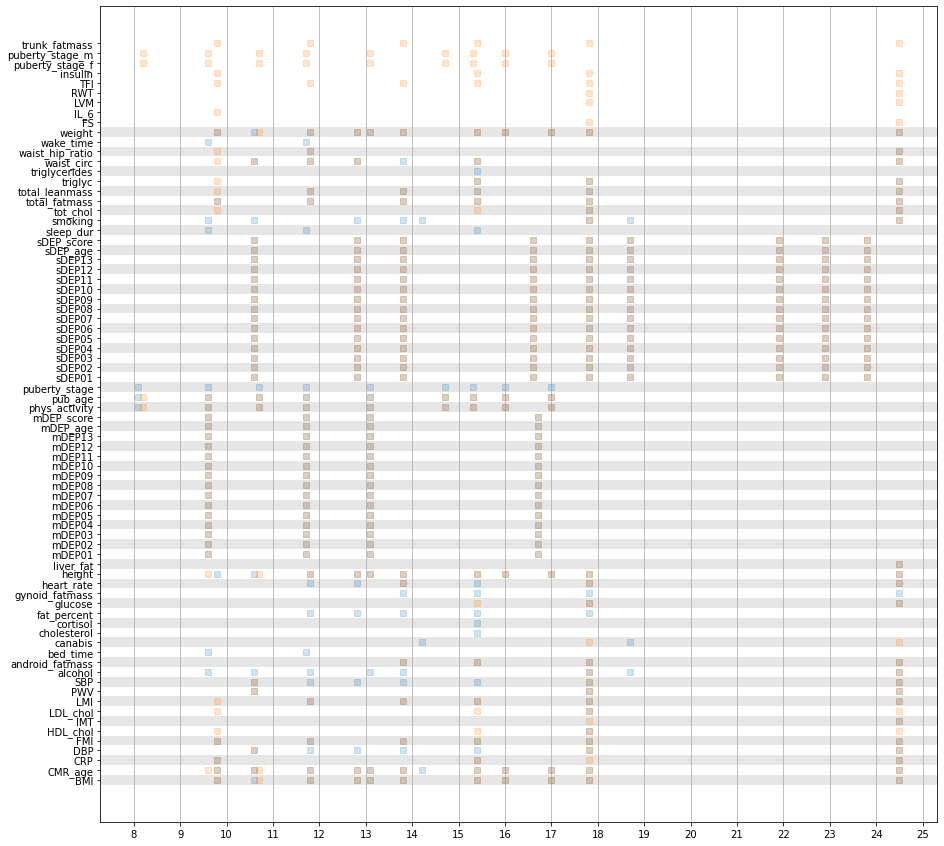

In [4]:
fig, axs = plt.subplot_mosaic('A', figsize=(15,15))
var_overview(dAFAR, axs['A'])
var_overview(dEC, axs['A'])

In [6]:
# Save easy descriptives 
desc_df = dEC.describe(percentiles=[.05, .25, .5, .75, .95])
# desc_df.to_csv('../mats/descdf.csv')

In [3]:
# Create a dictionary with more complex descriptive values
# desc = {}

# for var in list(d.columns)[1:]:

#     summary = pd.DataFrame(d[var].describe(percentiles=[.05, .25, .5, .75, .95])).T
    
#     v_count = pd.DataFrame([d[var].value_counts(normalize=False, dropna=False), # value count (with NA)
#                       d[var].value_counts(normalize=True, dropna=False),  # percentage (with NA and without)
#                       d[var].value_counts(normalize=True, dropna=True)], 
#                      index=['count','prop_NA','prop_noNA']).T.sort_index()
#     v_count = v_count.iloc[:-1] # remove duplicated NA row
#     v_count.fillna('null') # json does not encode NaN
    
#     density = pd.DataFrame()
#     # Continuos variables: add pdf
#     if v_count.shape[0] > 10:
#         # v_count = v_count.iloc[:-1] # revove other NA row
#         # create smooth curve for desnsity
#         # v_count['smooth'] = signal.savgol_filter(v_count['count'], v_count.shape[0]//2, 3) # window and order of fitted polynomial
        
#         x = d[var].dropna()
#         density['x'] = np.linspace(min(x), max(x), len(x))
#         density['dens'] = sum(norm(i).pdf(density['x']) for i in x) # this one takes a sec to run 
        
#     desc[var] = [summary.to_dict('records') , v_count.to_dict('records'), density.to_dict('records')]
#     # Status
#     # print(var)


In [4]:
# import json

# with open('../mats/descrip.json', 'w') as f:
#     json.dump(desc, f)


In [23]:

dep_names = ['Felt miserable or unhappy',
             'Didn\'t enjoy anything at all',
             'Felt so tired they just sat around and did nothing',
             'Was very restless',
             'Felt they were no good any more',
             'Cried a lot',
             'Found it hard to think properly or concentrate',
             'Hated themselves',
             'Felt they were a bad person',
             'Felt lonely',
             'Thought nobody really loved them',
             'Thought they would never be as good as other people',
             'Felt they did everything wrong']

cmr_labels = {#'height':'Height',
              #'weight':'Weight',
              'BMI':'Body mass index',
              'waist_circ':'Waist circumference',
              # 'waist_hip_ratio':'Waist/hip ratio',
              #'total_fatmass':'Total fat mass',
              #'total_leanmass':'Total lean mass',
              'FMI':'Fat mass index',
              'LMI':'Lean mass index',
              #'trunk_fatmass':'Trunk fat mass',
              'android_fatmass':'Android fat mass',
              #'liver_fat':'Liver fat',
              #'SBP':'Systolic blood pressure',
              #'DBP':'Diastolic blood pressure',
              #'PWV':'Pulse wave velocity',
              #'IMT':'Intima-media thickness',
              #'heart_rate':'Heart rate',
              #'LVM':'Left ventricular mass',
              #'RWT':'Relative wall thickness',
              #'FS':'Fractional shortening',
              #'tot_chol':'Total cholesterol',
              'HDL_chol':'HDL-cholesterol',
              'LDL_chol':'LDL-cholesterol',
              'triglyc':'Triglycerides',
              'insulin':'Insulin',
              #'glucose':'Glucose',
              'CRP':'C-reactive protein',}
              #'IL_6':'Interleaukin-6'}

In [13]:
d = desc_df
dep = d[list(d.columns[d.columns.str.contains('DEP')])]
cmr = d[list(d.columns[d.columns.str.contains('CMR')])]

In [14]:
def cmr_meas(age):
    t = d[list(d.columns[d.columns.str.contains(age) & ~(d.columns.str.contains('DEP|age'))])]
    s = [x.split('_'+age)[0] for x in t.columns]
    return(s)
def dep_meas(age):
    t = d[list(d.columns[d.columns.str.contains(age) & d.columns.str.contains('DEP') & ~(d.columns.str.contains('score|age'))])]
    s = [x.split('_'+age)[0][1:] for x in t.columns]
    return(s)
def get_age(list_ages): 
    return( cmr.loc['50%', cmr.columns.str.contains('|'.join(list_ages))])

In [22]:
labels = {'DEP01':'Felt miserable or unhappy',
          'DEP02':'Didn\'t enjoy anything at all',
          'DEP03':'Felt so tired they just sat around and did nothing',
          'DEP04':'Was very restless',
          'DEP05':'Felt they were no good any more',
          'DEP06':'Cried a lot',
          'DEP07':'Found it hard to think properly or concentrate',
          'DEP08':'Hated themselves',
          'DEP09':'Felt they were a bad person',
          'DEP10':'Felt lonely',
          'DEP11':'Thought nobody really loved them',
          'DEP12':'Thought they would never be as good as other people',
          'DEP13':'Felt they did everything wrong',
          # 'DEP_score':'Total depression score',
          #'height':'Height',
          #'weight':'Weight',
          'BMI':'Body mass index',
          'waist_circ':'Waist circumference',
          #'waist_hip_ratio':'Waist/hip ratio',
          #'total_fatmass':'Total fat mass',
          #'total_leanmass':'Total lean mass',
          #'trunk_fatmass':'Trunk fat mass',
          'android_fatmass':'Android fat mass',
          'FMI':'Fat mass index',
          'LMI':'Lean mass index',
          #'TFI':'Trunk fat mass index',
          #'liver_fat':'Liver fat',
          #'SBP':'Systolic blood pressure',
          #'DBP':'Diastolic blood pressure',
          #'PWV':'Pulse wave velocity',
          #'IMT':'Intima-media thickness',
          #'heart_rate':'Heart rate',
          #'LVM':'Left ventricular mass',
          #'RWT':'Relative wall thickness',
          #'FS':'Fractional shortening',
          #'tot_chol':'Total cholesterol',
          'HDL_chol':'HDL-cholesterol',
          'LDL_chol':'LDL-cholesterol',
          'insulin':'Insulin',
          'triglyc':'Triglycerides',
          #'glucose':'Glucose',
          'CRP':'C-reactive protein',
          #'IL_6':'Interleaukin-6',
          #'alcohol':'Alcohol consumption',
          #'canabis':'Cannabis consumption',
          #'smoking':'Smoking (tobacco)'
         }

### Figure 1

/var/folders/f9/fknlq25n23l74zmhg8zbckx80000gn/T/ipykernel_51351/3154719706.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(names, fontsize=fs1)
/var/folders/f9/fknlq25n23l74zmhg8zbckx80000gn/T/ipykernel_51351/3154719706.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(names, fontsize=fs1)


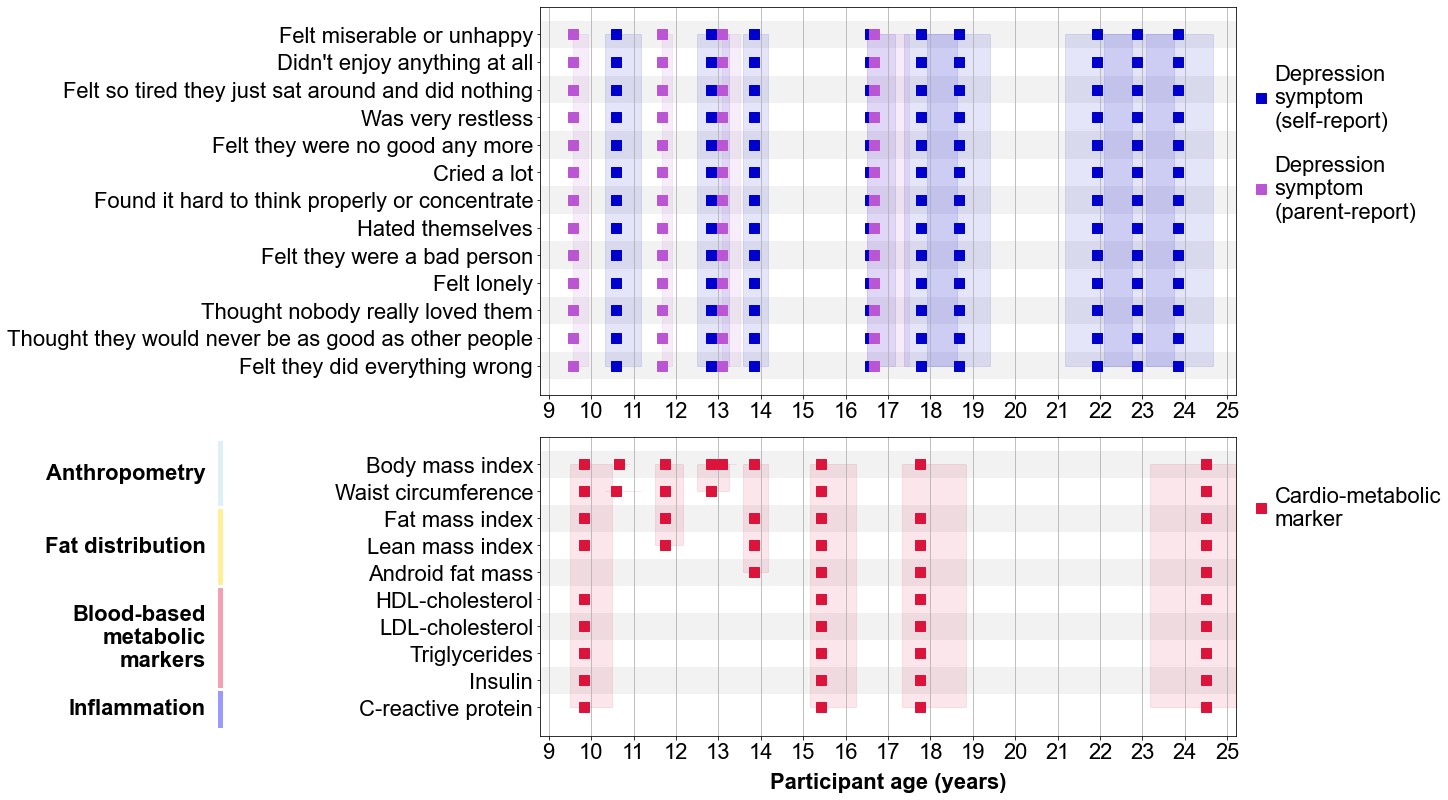

In [40]:
fig, axs = plt.subplot_mosaic('Ax;Bx', figsize=(20,11), width_ratios=[10,1],
                              height_ratios=[len(dep_names),len(cmr_labels)], layout='constrained')

plt.rcParams["font.family"] = "Arial"

fs1 = 22

def plot_age(ax, dset_name):
    if dset_name=='dep': 
        label_order = ['DEP'+str(x).zfill(2) for x in range(1,14)]
    else:
        label_order = cmr_labels.keys()
    
    # Set up order of labels 
    ax.plot([9.55]*len(label_order), label_order, ' ', ms=1)
    # Add background grid 
    ax.xaxis.grid(True)
    for y in [i-0.5 for i in range(0, len(label_order), 2)]:
        ax.axhspan(y, y+1, facecolor='grey', alpha=0.1)
    
    dset = globals()[dset_name]
    
    for c in dset.columns:
        age = str(round(dset.loc['50%',c],1))
        if dset_name=='dep': 
            lbls = [x for x in label_order if x in dep_meas(age)]
            col = 'mediumblue'if 'sDEP' in c else 'mediumorchid'
            names = dep_names
        else:
            lbls = [x for x in cmr_labels if x in cmr_meas(age)]
            col = 'crimson'; names = list(cmr_labels.values())
        # Plot median age
        ax.plot([dset.loc['50%',c]]*len(lbls), lbls, 's', ms=10, color=col)
        # Plot interquartile range 
        ax.fill_betweenx(lbls, dset.loc['5%',c], dset.loc['95%',c], color=col, alpha=0.1)
    
    # Add self-reported height and weight 
    # if dset_name=='cmr': 
    #     ax.plot(get_age(['9.6','10.7','11.8','16y','17y']), ['height']*5, 's', ms=10, color='darkred')
    #     ax.plot(get_age(['10.7','16y','17y']), ['weight']*3, 's', ms=10, color='darkred')
    
    # Adjust ranges 
    ax.set(xlim=(8.8,25.2),ylim=(-1,len(label_order)+0.05))
    # Set x axis ticks every 1 year 
    ax.set_xticks(range(9,26)); ax.set_xticklabels(range(9,26), fontsize=fs1)
    if dset_name=='cmr': ax.set_xlabel('Participant age (years)', fontsize=fs1, fontweight='bold', labelpad=10)
    # Add readable y labels
    ax.set_yticklabels(names, fontsize=fs1)
    # Order axis
    ax.invert_yaxis()
    
plot_age(axs['A'], 'dep')
plot_age(axs['B'], 'cmr')

# Add legend -----------------------------------------------------------------------
labs = ['Depression\nsymptom\n(self-report)','Depression\nsymptom\n(parent-report)',
        'Cardio-metabolic\nmarker'] #,'Cardio-metabolic\nmarker\n(reported)']
for i, c in enumerate(['mediumblue','mediumorchid','crimson']): # 'darkred'
    pos = [1, 3, 10]
    p = pos[i] # i if i<2 else i+3.5
    axs['x'].plot(1, p, 's', ms=10, color=c)
    axs['x'].text(3, p, labs[i], fontsize=fs1, va='center')
    
axs['x'].set_axis_off()
axs['x'].set(xlim=(0,10),ylim=[-1,15])
axs['x'].invert_yaxis()

def markcmr(end,start, col, label):
    fig.add_artist(lines.Line2D([.15]*2, [start,end],  lw=5., color=col, alpha=0.4))
    fig.text(.14, (end+start)/2, label, ha='right',va='center', fontsize=fs1, fontweight='bold')
    
#markcmr(.595,.535, 'lightblue','Anthropometry')
#markcmr(.525,.425, 'yellow','Fat distribution')
#markcmr(.415,.330, 'orange','Arteries')
#markcmr(.320,.240, 'red',  'Heart')
markcmr(.445,.370, 'lightblue','Anthropometry')
markcmr(.360,.270, 'gold','Fat distribution')
markcmr(.260,.140, 'crimson','Blood-based\nmetabolic\nmarkers') # brown
markcmr(.130,.090, 'blue','Inflammation')


#fig.savefig('assets/timeline.pdf', dpi=400)
#fig.savefig('assets/timeline.png', dpi=70, bbox_inches='tight')

In [ ]:
fig, axs = plt.subplot_mosaic('A;B', figsize=(20,5))

dep = d[list(d.columns[d.columns.str.contains('DEP_score')])]
cmr = d[list(d.columns[~d.columns.str.contains('DEP|sex|age|smoking|canabis|alcohol')])]

axs['A'].plot([9.6,10.6,11.7,12.8,13.1,13.8,16.6,16.7,17.8,18.7,21.9,22.9,23.8],dep.describe().loc['count'], '-o')
axs['B'].plot(cmr.describe().loc['count'], '-o')

axs['B'].tick_params(axis='x', labelrotation = 90)
axs['B'].set_xlim(-1,cmr.shape[1]-1);

axs['A'].set_ylim(500, 8400);axs['B'].set_ylim(500, 8500);

fig.savefig('assets/samplesizes.pdf', dpi=400)
fig.savefig('assets/samplesizes.png', dpi=70, bbox_inches='tight')

In [ ]:
cs = d.describe().loc['count'].sort_values()

In [ ]:
cs.tail(30)